In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [194]:
df.shape

(962, 2)

In [195]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


<Axes: >

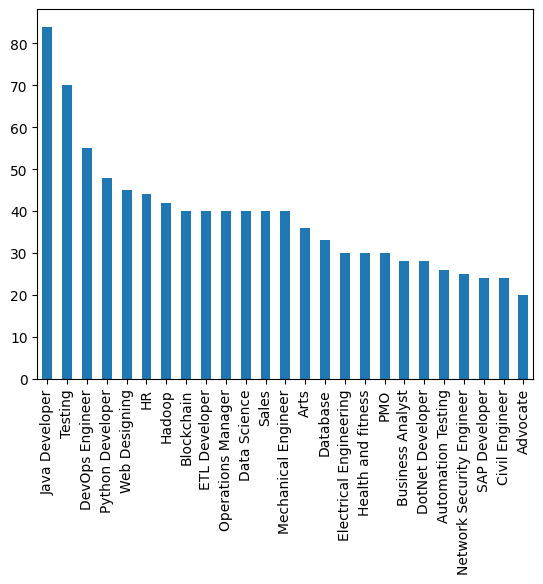

In [196]:
df['Category'].value_counts().plot(kind='bar')

In [197]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [198]:
counts = df['Category'].value_counts()
lab  = df['Category'].unique()

In [199]:
counts,lab

(Java Developer               84
 Testing                      70
 DevOps Engineer              55
 Python Developer             48
 Web Designing                45
 HR                           44
 Hadoop                       42
 Blockchain                   40
 ETL Developer                40
 Operations Manager           40
 Data Science                 40
 Sales                        40
 Mechanical Engineer          40
 Arts                         36
 Database                     33
 Electrical Engineering       30
 Health and fitness           30
 PMO                          30
 Business Analyst             28
 DotNet Developer             28
 Automation Testing           26
 Network Security Engineer    25
 SAP Developer                24
 Civil Engineer               24
 Advocate                     20
 Name: Category, dtype: int64,
 array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
        'Mechanical Engineer', 'Sales', 'Health and fitness',
        'Civil 

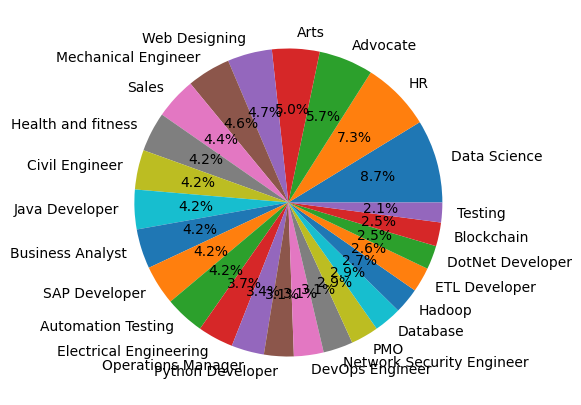

In [200]:
plt.figure(figsize=(15,5))
plt.pie(counts,labels = lab,autopct = '%1.1f%%')
plt.show()

In [201]:
df['Category'][0]

'Data Science'

In [202]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data

1. URLS
2. Hashtags
3. Mentions
4. Special Letters
5. Punctuations

In [203]:
import re

In [204]:
import re

def Clean_Resume(txt):
    # Use a regex pattern to match URLs (with or without trailing whitespace)
    cleanTxt = re.sub(r'http\S+', '', txt)
    cleanTxt = re.sub(r'RT|CC', '', cleanTxt)
    cleanTxt = re.sub(r'@\S+', '', cleanTxt) # --> @
    cleanTxt = re.sub(r'#\S+', '', cleanTxt) #--> hastags
    cleanTxt = re.sub(r'[%s]'% re.escape("""!"#$%^&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', cleanTxt) #-- > special char
    cleanTxt = re.sub(r'[^\x00-\x7f]', '', cleanTxt) # -- > 
    cleanTxt = re.sub(r'\s+', ' ', cleanTxt) # --> \n ,\t

    return cleanTxt


In [205]:
Clean_Resume('Hello $ my name is \n #prajwal http://hello_world prajwalganvir001@gmail.com')

'Hello my name is prajwalganvir001'

In [206]:
df['Resume']=df['Resume'].apply(lambda x: Clean_Resume(x))

In [207]:
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 BE UITR...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to accept the challenges Positive...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...


# this is multilevel classification

In [210]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [211]:
le.fit(df['Category'])

df['Category'] = le.transform(df['Category'])

In [213]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [232]:
for sent in df['Resume']:
    if len(sent)<100:
        print(sent)

# Now we will do Vectorization

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

In [233]:
577 + 385

962

# splitting

In [234]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(req_text,df['Category'],test_size = 0.3,random_state=42)

In [235]:
X_train.shape,y_train.shape

((673, 7888), (673,))

In [236]:
X_test.shape,y_test.shape

((289, 7888), (289,))

# now lets train the model and print classification report

In [244]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())

clf.fit(X_train,y_train)

ypred= clf.predict(X_test)
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23  2  3 18 14  1 12 13 22 12 11 23 18 15 19 15  6  0 15  8  9 16  6 12
 14  9 15  4  0 20 16  7  8 23  3 23  9  6  0  6  9 14 15 19  9  3  1 15
 13  5  6 12 11 15  8 21 16  4 12  8 21 20  5  9 22 13 16 19 15  4 22 10
 23 13  2 15 15  4 17 15  6 24 23 15  3 15 23 18 18 20 23 13 10 20 11 23
  4]


In [245]:
from sklearn.metrics import classification_report,accuracy_score

In [246]:
check = accuracy_score(y_test,ypred)

In [247]:
print(check)

0.986159169550173


# prediction_system 

In [248]:
import pickle

pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))